## Boston Housing problem using kNN

### Predicting Housing Median Prices

The file BostonHousing.csv contains information on over 500 census tracts in Boston, where for each tract multiple variables are recorded. The last column (CAT.MEDV) was derived from MEDV, such that it obtains the value 1 if MEDV > 30 and 0 otherwise. Consider the goal of predicting the median value (MEDV) of a tract, given the
information in the first 12 columns.

Partition the data into training (60%) and validation (40%) sets.

#### Data Description as available on Kaggle

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

##### crim
per capita crime rate by town.
##### zn
proportion of residential land zoned for lots over 25,000 sq.ft.
##### indus
proportion of non-retail business acres per town.
##### chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
##### nox
nitrogen oxides concentration (parts per 10 million).
##### rm
average number of rooms per dwelling.
##### age
proportion of owner-occupied units built prior to 1940.
##### dis
weighted mean of distances to five Boston employment centres.
##### rad
index of accessibility to radial highways.
##### tax
full-value property-tax rate per \$10,000.
#### ptratio
pupil-teacher ratio by town.
##### black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
##### lstat
lower status of the population (percent).
##### medv
median value of owner-occupied homes in \$1000s.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exploratory Data Analysis

In [2]:
#loading the csv file
data_boston = pd.read_csv('BostonHousing.csv')

#looking at the shape of the dataset
data_boston.shape

(506, 14)

In [3]:
#looking at the details of each column in the dataset
data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM         506 non-null float64
ZN           506 non-null float64
INDUS        506 non-null float64
CHAS         506 non-null int64
NOX          506 non-null float64
RM           506 non-null float64
AGE          506 non-null float64
DIS          506 non-null float64
RAD          506 non-null int64
TAX          506 non-null int64
PTRATIO      506 non-null float64
LSTAT        506 non-null float64
MEDV         506 non-null float64
CAT. MEDV    506 non-null int64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [4]:
#checking for null values
data_boston.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

The dataset has no null values.

In [5]:
#looking at the dataset
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [6]:
#looking at the statistics of the dataset
data_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
# dropping CAT.MEDV column as per the requirement of our problem
data_boston.drop('CAT. MEDV',axis=1, inplace=True)
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Descriptive Data Analysis

#### Histogram of Median Home Prices (MEDV)

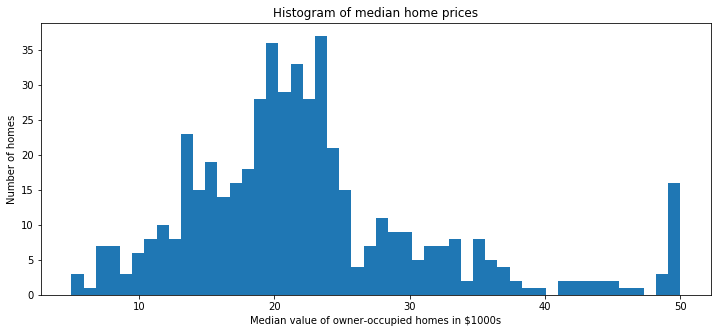

In [8]:
%matplotlib inline

plt.figure(figsize=(12,5))
plt.hist(data_boston['MEDV'], bins=50)
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Number of homes')
plt.title('Histogram of median home prices')
plt.show()

The graph looks positively skewed. Also, it can be interpreted from the graph that there are less homes with median value of owner-occupied homes beyond dollar 25,000. Also, homes with median value between dollar 19,000 and dollar 24,000 are maximum in number. 

#### Scatter plot of Crime (CRIM) and Median Home Prices (MEDV)

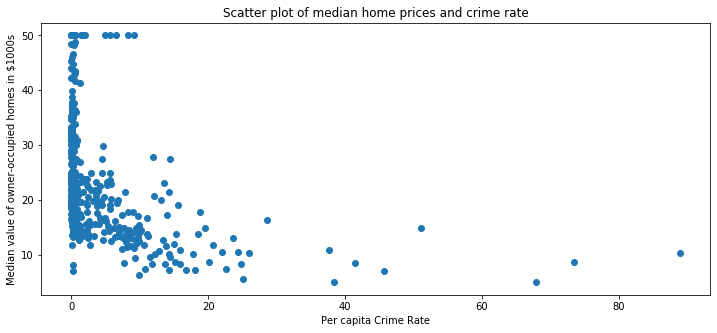

In [31]:
plt.figure(figsize=(12,5))
plt.scatter(data_boston['CRIM'],data_boston['MEDV'])
plt.xlabel('Per capita Crime Rate')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.title('Scatter plot of median home prices and crime rate')
plt.show()

It can be interpreted from the graph that the median value of homes is clearly higher for homes with less per capita crime rate. The graph shows a few outliers indicating that the areas with relatively more per capita crime rate has homes with lower median value.

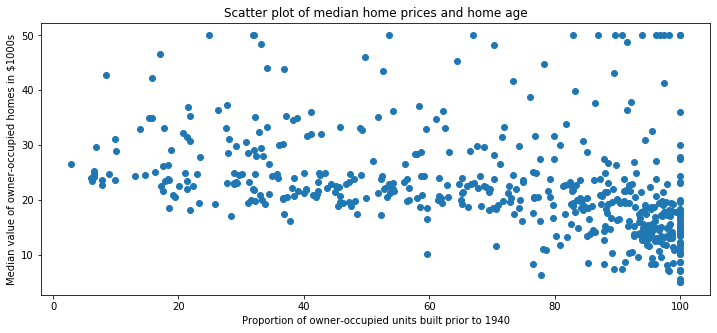

In [32]:
plt.figure(figsize=(12,5))
plt.scatter(data_boston['AGE'],data_boston['MEDV'])
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.title('Scatter plot of median home prices and home age')
plt.show()

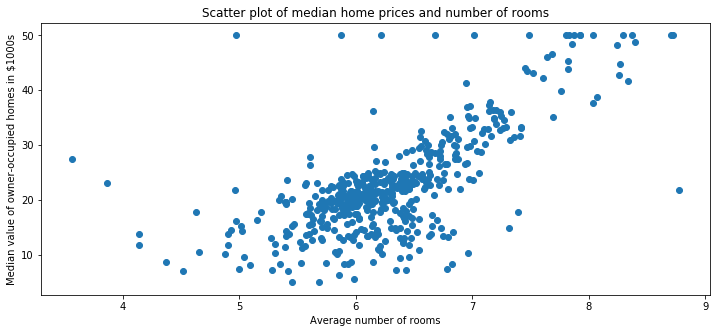

In [33]:
plt.figure(figsize=(12,5))
plt.scatter(data_boston['RM'],data_boston['MEDV'])
plt.xlabel('Average number of rooms')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.title('Scatter plot of median home prices and number of rooms')
plt.show()

Likewise we can do more visualization of this data to get better insights.

## (a)

Perform a k-NN prediction with all 12 predictors (ignore the CAT.MEDV column), trying values of k from 1 to 5. What is the best k? What does it mean?

### Train test split of the data

In [34]:
from sklearn import preprocessing

#dropping the column which needs to be predicted 
X = data_boston.drop('MEDV', axis=1).values
y = data_boston['MEDV'].values

#normalizing the data
X = preprocessing.normalize(X)
#Normalizing is done in kNN models as the data calculate the distance between two points. 
#If one of the features has a broad range of values, the distance will be governed by this particular feature. 
#So after normalization each feature contributes approximately proportionately to the final distance.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
#we have not used startify=True here as this is a prediction problem where we have to predict the value of a quantitative variable

### Using k = 1 in kNN regressor

In [14]:
from sklearn.neighbors import KNeighborsRegressor
#we have used KNeighborsRegressor as we have to predict the value of continuous variable 'MEDV'

knn = KNeighborsRegressor(n_neighbors=1, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [15]:
#checking the score
knn.score(X_test,y_test)

0.513649525688789

The score does not seem to be good. We will try to improve this score by using different values of k.

### Using k = 2 in kNN regressor

In [16]:
knn = KNeighborsRegressor(n_neighbors=2, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [17]:
#checking the score
knn.score(X_test,y_test)

0.49125430406383724

Let's see if this can be improved further.

### Using k = 3 in kNN regressor

In [18]:
knn = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [19]:
#checking the score
knn.score(X_test,y_test)

0.5121303262844936

### Using k = 4 in kNN regressor

In [20]:
knn = KNeighborsRegressor(n_neighbors=4, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [21]:
knn.score(X_test,y_test)

0.5289492271634778

### Using k = 5 in kNN regressor

In [22]:
knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [23]:
knn.score(X_test, y_test)

0.510852087287409

We can see that the accuracy score of our model is almost similar for k = 3 and 4. Let us plot the accuracy curve for both training and test sets and error graph to find the best value of k.

#### Finding average accuracy score for training and test set

In [35]:
#Chossing the value of k from 1 to 5 and storing it in an array
neighbors = np.arange(1,6)

#creating empty arrays equal to the length of neighbors to store the accuracy score
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    
    #setup a knn regressor with k neaighbors
    knn = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    
    #fit the model
    knn.fit(X_train, y_train)
    
    #computing accuracy for training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #computing accuracy for testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#### Plotting the training and testing accuracy plot

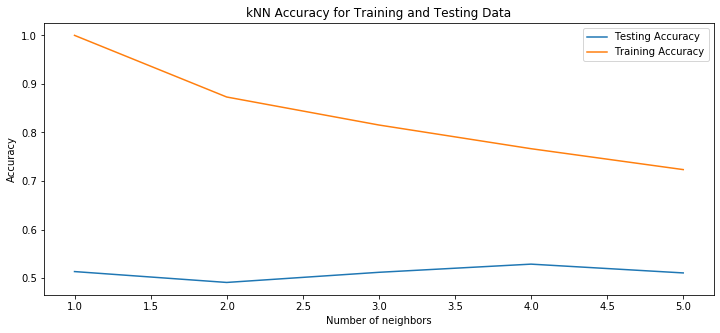

In [36]:
#Generate plot to visualize the testing and training score
plt.figure(figsize=(12,5))
plt.title('kNN Accuracy for Training and Testing Data')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Plotting the error graph

In [37]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

error = []
RMSE = []

#calculating error for k values between 1 and 5 on test set and also the root mean square error
for i in range(1,6):
    
    knn = KNeighborsRegressor(n_neighbors=i, metric='manhattan')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    #calculating error
    error.append(np.mean(pred_i != y_test))
    
    #calculating root mean squared error
    RMSE_i = sqrt(mean_squared_error(y_test, pred_i))
    RMSE.append(RMSE_i)

print("Error:", error)
print("RMSE:", RMSE)

Error: [0.9802955665024631, 0.9852216748768473, 0.9901477832512315, 1.0, 1.0]
RMSE: [6.627491631092192, 6.778364051290152, 6.637834615695931, 6.522414224447182, 6.646524629847723]


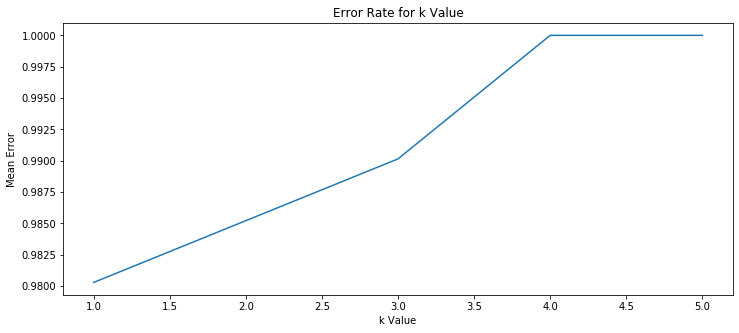

In [45]:
plt.figure(figsize=(12,5))
plt.plot(range(1,6), error)
#, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate for k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Error')
plt.show()

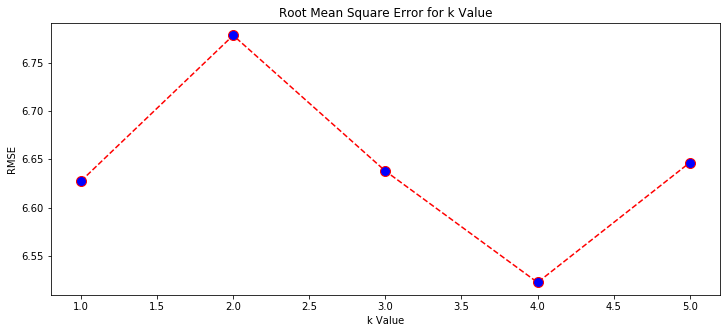

In [47]:
plt.figure(figsize=(12,5))
plt.plot(range(1,6), RMSE, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Root Mean Square Error for k Value')
plt.xlabel('k Value')
plt.ylabel('RMSE')
plt.show()

The error graph shows that the error rate is minimum for k = 1. However, we do not want to use k = 1 because of overfitting issue. The error rate for k = 2 and 3 is also lower than k = 4 and 5. Also, the RMSE is the low for k = 3, so we will take k = 3 as our best value. This means that, for a given record, MEDV is predicted by averaging the MEDVs for the 3 closest records.

### (b)
Predict the MEDV for a tract with the following information, using the best k:

CRIM: 0.2, ZN: 0, INDUS: 7, CHAS: 0, NOX: 0.538, RM: 6, AGE: 62, DIS: 4.7, RAD: 4, TAX: 307, PTRATIO: 21, LSTAT: 10

In [42]:
knn = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn.fit(X_train, y_train)

X_pred = [[0.2,0,7,0,0.538,6,62,4.7,4,307,21,10]]
X_pred = preprocessing.normalize(X_pred)
y_pred = knn.predict(X_pred)
print(y_pred)

[22.33333333]


The model predicted value for the given data is 22.3.

### (c)
If we used the above k-NN algorithm to score the training data, what would be the error of the training set?

In [39]:
y_pred = knn.predict(X_train)
RMSE_3 = sqrt(mean_squared_error(y_pred, y_train))
print(RMSE_3)

3.8435101912694822


### (d)
Why is the validation data error overly optimistic compared to the error rate when
applying this k-NN predictor to new data?

The validation data error is overly optimistic, that is, lower than the true error rate because our validation data was part of the same set as our training data. This means that our model was essentially trained to solve that specific dataset.

### (e)
If the purpose is to predict MEDV for several thousands of new tracts, what would be the disadvantage of using k-NN prediction? List the operations that the algorithm goes through in order to produce each prediction.

If we have to predict MEDV for several thousands of new tracts, the major disadvantage would be the amount of time. In order to make our predictions, comparisons have to be done in order to determine the distance between each new tract and all other tracts in the dataset.

The operations that the algorithm goes through in order to produce each prediction are:
1. Compute the Manhattan distance between each new tract and all given tracts.
2. Order the distances in ascending order.
3. Perform a cross validation based on RMSE to find the best value of hyper parameter k.
4. Calculate an inverse distance weighted average with the k-nearest multivariate neighbors.

#### We can see that in this case the k Nearest Neighbors didn't seem to do well with regression as our accuracy score is not too high. Other models might be a better fit for this problem.